In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
# !tar -xvzf /content/drive/MyDrive/coc_hackathon/lfw.tgz   

In [ ]:
!unzip /content/drive/MyDrive/coc_hackathon/cartoon.zip

unzip:  cannot find or open /content/drive/MyDrive/coc_hackathon/cartoon.zip, /content/drive/MyDrive/coc_hackathon/cartoon.zip.zip or /content/drive/MyDrive/coc_hackathon/cartoon.zip.ZIP.


In [ ]:
!unzip /content/drive/MyDrive/coc_hackathon/lfw-a.zip

Archive:  /content/drive/MyDrive/coc_hackathon/lfw-a.zip
replace lfw/Aaron_Eckhart/Aaron_Eckhart_0001.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
import shutil

for folder in os.listdir('/content/lfw'):
  for image in os.listdir(f'/content/lfw/{folder}'):
    shutil.copy(f'/content/lfw/{folder}/{image}', f'/content/drive/MyDrive/coc_hackathon/lfw_full/{image}')

In [ ]:
len(os.listdir('/content/drive/MyDrive/coc_hackathon/cartoons'))

8928

In [ ]:
import shutil
!mkdir /content/drive/MyDrive/coc_hackathon/cartoons
for image in os.listdir('/content/IIIT-CFW1.0/cartoonFaces'):
  print(image)
  shutil.copy(f'/content/IIIT-CFW1.0/cartoonFaces/{image}', f'/content/drive/MyDrive/coc_hackathon/cartoons/{image}')

Streaming output truncated to the last 5000 lines.
WinstonChurchill0024.jpeg
VladimirPutin0102.jpeg
MattDamon0021.jpeg
TaylorSwift0019.jpeg
ScarlettJohansson0099.jpeg
LeonardoDiCaprio0064.jpeg
Shakira0035.jpeg
PaulMcCartney0049.jpeg
LucilleBall0025.jpeg
AngelinaJolie0211.jpeg
MichaelJackson0007.jpeg
AdolfHitler0059.jpeg
NarendraModi0011.jpeg
ManmohanSingh0001.jpeg
BradPitt0048.jpeg
MartinLutherKing0056.jpeg
JackieChan0049.jpeg
DwayneJohnson0026.jpeg
HughJackman0019.jpeg
DavidBeckham0039.jpeg
MahatmaGandhi0026.jpeg
ManmohanSingh0029.jpeg
NarendraModi0024.jpeg
MeganFox0132.jpeg
TigerWoods0024.jpeg
MarilynMonroe0064.jpeg
SelenaGomez0037.jpeg
MeganFox0090.jpeg
RafaelNadal0022.jpeg
VladimirPutin0110.jpeg
JawaharlalNehru0005.jpeg
MichaelJackson0038.jpeg
DanielCraig0093.jpeg
MarilynMonroe0073.jpeg
BruceLee0143.jpeg
AishwaryaRai0088.jpeg
BruceWillis0048.jpeg
CharlieChaplin0002.jpeg
SelenaGomez0046.jpeg
BruceLee0028.jpeg
MartinLutherKing0003.jpeg
LouisArmstrong0002.jpeg
MarilynMonroe0190.jpeg
P

In [ ]:
len(os.listdir('/content/drive/MyDrive/coc_hackathon/lfw_full'))

13233

In [ ]:
import shutil

for folder in os.listdir('/content/lfw'):
  for image in os.listdir(f'/content/lfw/{folder}'):
    shutil.copy(f'/content/lfw/{folder}/{image}', f'/content/drive/MyDrive/coc_hackathon/lfw_full/{image}')

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
import torch.nn as nn
from torchvision import datasets, transforms
import re, os, sys, json, cv2, random
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import pandas as pd 
import torchvision
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, f1_score, classification_report, confusion_matrix
import seaborn as sns

In [ ]:
torch.__version__

'1.13.1+cu116'

In [ ]:
torchvision.__version__

'0.14.1+cu116'

In [ ]:
!mkdir /content/drive/MyDrive/coc_hackathon/Data
!mkdir /content/drive/MyDrive/coc_hackathon/Data/cartoon
!mkdir /content/drive/MyDrive/coc_hackathon/Data/real

for image in os.listdir('/content/drive/MyDrive/coc_hackathon/lfw_full/'):
  shutil.copy(f'/content/drive/MyDrive/coc_hackathon/lfw_full/{image}', f'/content/drive/MyDrive/coc_hackathon/Data/real/{image}')
  

for image in os.listdir('/content/drive/MyDrive/coc_hackathon/cartoons/'):
  shutil.copy(f'/content/drive/MyDrive/coc_hackathon/cartoons/{image}', f'/content/drive/MyDrive/coc_hackathon/Data/cartoon/{image}')

In [ ]:
len(os.listdir('/content/drive/MyDrive/coc_hackathon/Data/cartoon')),len(os.listdir('/content/drive/MyDrive/coc_hackathon/Data/real'))

(8928, 13233)

real                   : 100%|███████████████████████████████████████| 13233/13233 [00:45<00:00, 290.61file/s]


2 kind of images were found in the dataset
22161 images were found in the dataset.
17728 for training, 4433 for validation
average image height=  211   average image width=  200  aspect ratio h/w=  1.055


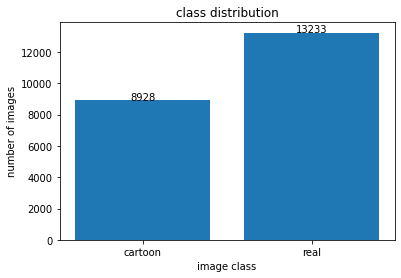

In [ ]:
root = '/content/drive/MyDrive/coc_hackathon/Data/'

def read_split_data(root, plot_image=False):
    filepaths = []
    labels = []
    bad_images = []

    random.seed(0)
    assert os.path.exists(root), 'wdnmd, 你tm路径不对啊!'

    classes = [cla for cla in os.listdir(root) if os.path.isdir(os.path.join(root, cla))]
    classes.sort()
    class_indices = {k: v for v, k in enumerate(classes)}

    json_str = json.dumps({v: k for k, v in class_indices.items()}, indent=4)

    with open('classes_indices.json', 'w') as json_file:
        json_file.write(json_str)

    every_class_num = []
    supported = ['.jpg', '.png', '.jpeg', '.PNG', '.JPG', '.JPEG']

    for klass in classes:
        classpath = os.path.join(root, klass)
        images = [os.path.join(root, klass, i) for i in os.listdir(classpath) if os.path.splitext(i)[-1] in supported]
        every_class_num.append(len(images))
        flist = sorted(os.listdir(classpath))
        desc = f'{klass:23s}'
        for f in tqdm(flist, ncols=110, desc=desc, unit='file', colour='blue'):
            fpath = os.path.join(classpath, f)
            fl = f.lower()
            index = fl.rfind('.')
            ext = fl[index:]
            if ext in supported:
                try:
                    img = cv2.imread(fpath)
                    filepaths.append(fpath)
                    labels.append(klass)
                except:
                    bad_images.append(fpath)
                    print('defective image file: ', fpath)
            else:
                bad_images.append(fpath)
    Fseries = pd.Series(filepaths, name='filepaths')
    Lseries = pd.Series(labels, name='labels')
    df = pd.concat([Fseries, Lseries], axis=1)
    print(f'{len(df.labels.unique())} kind of images were found in the dataset')
    
    train_df, test_df = train_test_split(df, train_size=.8, shuffle=True, random_state=123, stratify=df['labels'])

    train_image_path = train_df['filepaths'].tolist()
    val_image_path = test_df['filepaths'].tolist()

    train_image_label = [class_indices[i] for i in train_df['labels'].tolist()]
    val_image_label = [class_indices[i] for i in test_df['labels'].tolist()]

    sample_df = train_df.sample(n=50, replace=False)
    ht, wt, count = 0, 0, 0
    for i in range(len(sample_df)):
        fpath = sample_df['filepaths'].iloc[i]
        try:
            img = cv2.imread(fpath)
            h = img.shape[0]
            w = img.shape[1]
            ht += h
            wt += w
            count += 1
        except:
            pass
    have = int(ht / count)
    wave = int(wt / count)
    aspect_ratio = have / wave
    print('{} images were found in the dataset.\n{} for training, {} for validation'.format(
        sum(every_class_num), len(train_image_path), len(val_image_path)
    ))
    print('average image height= ', have, '  average image width= ', wave, ' aspect ratio h/w= ', aspect_ratio)

    if plot_image:
        plt.bar(range(len(classes)), every_class_num, align='center')
        plt.xticks(range(len(classes)), classes)

        for i, v in enumerate(every_class_num):
            plt.text(x=i, y=v + 5, s=str(v), ha='center')

        plt.xlabel('image class')
        plt.ylabel('number of images')

        plt.title('class distribution')
        plt.show()

    return train_image_path, train_image_label, val_image_path, val_image_label, class_indices

train_image_path, train_image_label, val_image_path, val_image_label, class_indices = read_split_data(root, plot_image=True)

In [ ]:
class MyDataset(Dataset):
    def __init__(self, image_path, image_labels, transform=None):
        self.image_path = image_path
        self.image_labels = image_labels
        self.transform = transform
        
    def __len__(self):
        return len(self.image_path)
    
    def __getitem__(self, idx):
        image = Image.open(self.image_path[idx]).convert('RGB')
        label = self.image_labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label
    
    @staticmethod
    def collate_fn(batch):
        images, labels = tuple(zip(*batch))
        images = torch.stack(images, dim=0)
        labels = torch.as_tensor(labels)
        return images, labels

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [ ]:

data_transform = {
    'train': transforms.Compose([transforms.RandomResizedCrop(300), transforms.ToTensor(), 
                                 transforms.RandomHorizontalFlip(), transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])]),
    'valid': transforms.Compose([transforms.Resize((300, 300)), transforms.CenterCrop(300), 
                                 transforms.ToTensor(), transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
}

batch_size = 32


train_dataset = MyDataset(train_image_path, train_image_label, transform=data_transform['train'])
trainloader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size, num_workers=0, collate_fn=train_dataset.collate_fn)

valid_dataset = MyDataset(val_image_path, val_image_label, transform=data_transform['valid'])
validloader = DataLoader(valid_dataset, shuffle=False, batch_size=batch_size, num_workers=0, collate_fn=valid_dataset.collate_fn)

In [ ]:
finetune_net = torchvision.models.efficientnet_b3(pretrained=True)
# finetune_net.classifier
finetune_net.classifier = nn.Sequential(nn.Dropout(0.4, inplace=True), 
                                        nn.Linear(1536, 1024),
                                        nn.BatchNorm1d(1024),
                                        nn.ReLU(inplace=True),
                                        nn.Linear(1024, 2))

/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B3_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B3_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/efficientnet_b3_rwightman-cf984f9c.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b3_rwightman-cf984f9c.pth


  0%|          | 0.00/47.2M [00:00<?, ?B/s]

In [ ]:
finetune_net = finetune_net.to(device)

In [ ]:
epochs = 1
save_path = './EfficientNetB3.pth'
    
best_val_acc = 0.0
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(finetune_net.parameters(), lr=0.0003, weight_decay=0.0005)
train_steps = len(trainloader)
valid_steps = len(validloader)

dfForAccuracy = pd.DataFrame(index=list(range(epochs)), columns=['Epoch', 'Accuracy'])

if os.path.exists(save_path):
    best_val_acc = max(pd.read_csv('./modelAccuracy.csv')['Accuracy'].tolist())
    finetune_net.load_state_dict(torch.load(save_path))


for epoch in range(epochs):
    running_loss = 0
    val_acc = 0
    train_acc = 0
    
    finetune_net.train()
    train_bar = tqdm(trainloader, file=sys.stdout, colour='red')
    for step, data in enumerate(train_bar):
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = finetune_net(images)
        loss = loss_function(outputs, labels)
        train_acc += (torch.argmax(outputs, dim=1) == labels).sum().item()
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        train_bar.desc = f'train epoch[{epoch+1} / {epochs}], loss{loss.data:.3f}'
    
    finetune_net.eval()
    with torch.no_grad():
        valid_bar = tqdm(validloader, file=sys.stdout, colour='red')
        for data in valid_bar:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = finetune_net(images)
            val_acc += (torch.argmax(outputs, dim=1) == labels).sum().item()
            
    val_accuracy = val_acc / len(valid_dataset)
    train_accuracy = train_acc / len(train_dataset)
    
    dfForAccuracy.loc[epoch, 'Epochs'] = epoch+1
    dfForAccuracy.loc[epoch, 'Accuracy'] = round(val_accuracy, 3)
    
    print(f'epoch [{epoch+1}/{epochs}] train_loss: {(running_loss / train_steps):.3f} ,train_accuracy: {train_accuracy:.3f}, val_accuracy {val_accuracy:.3f}')
    
    if val_accuracy > best_val_acc:
        best_val_acc = val_accuracy
        torch.save(finetune_net.state_dict(), save_path)
        
    if epoch == epochs - 1:
        dfForAccuracy.to_csv('./modelAccuracy.csv', index=False)                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

100%|██████████| 139/139 [00:47<00:00,  2.95it/s]
epoch [1/1] train_loss: 0.030 ,train_accuracy: 0.990, val_accuracy 0.998


In [ ]:
try:
    json_file = open('./classes_indices.json', 'r')
    class_indict = json.load(json_file)
except Exception as e:
    print(e)
    exit(-1)
    
class_indict

{'0': 'cartoon', '1': 'real'}

there were 92 errors in 4433 tests for an accuracy of  97.92%


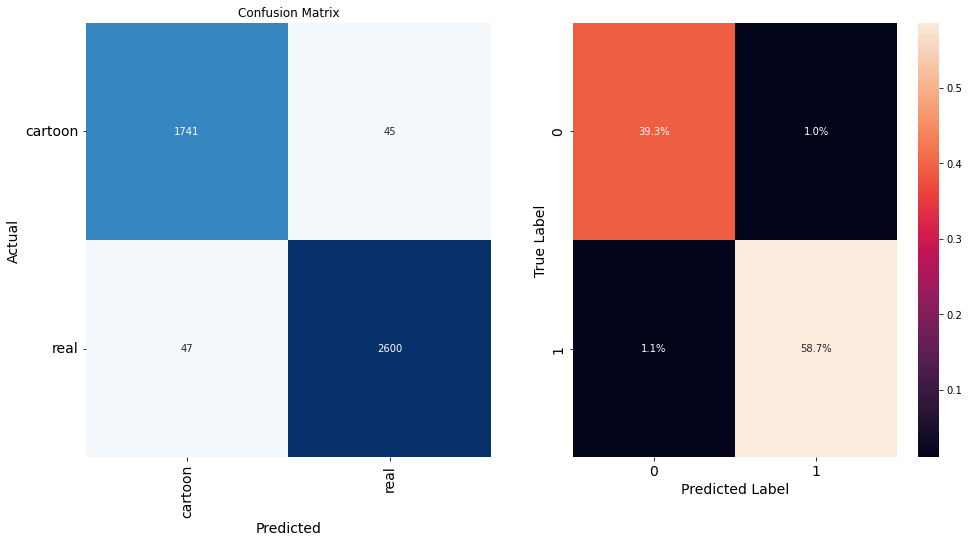

Classification Report:
----------------------
               precision    recall  f1-score   support

     cartoon     0.9737    0.9748    0.9743      1786
        real     0.9830    0.9822    0.9826      2647

    accuracy                         0.9792      4433
   macro avg     0.9784    0.9785    0.9784      4433
weighted avg     0.9793    0.9792    0.9792      4433



In [ ]:
def predictor(testloader):
    errors = 0
    y_pred, y_true = [], []
    
    finetune_net.load_state_dict(torch.load(save_path))

    finetune_net.eval()
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            preds = torch.argmax(torch.softmax(finetune_net(images), dim=0), dim=1)
            for i in range(len(preds)):
                y_pred.append(preds[i].cpu())
                y_true.append(labels[i].cpu())
    
    tests = len(y_pred)
    for i in range(tests):
        pred_index = y_pred[i]
        true_index = y_true[i]
        if pred_index != true_index:
            errors += 1
    acc = (1 - errors / tests) * 100
    print(f'there were {errors} errors in {tests} tests for an accuracy of {acc:6.2f}%')
    ypred = np.array(y_pred)
    ytrue = np.array(y_true)
    
    f1score = f1_score(ytrue, ypred, average='weighted') * 100
    
    class_count = len(list(class_indict.values()))
    classes = list(class_indict.values())
    
    cm = confusion_matrix(ytrue, y_pred)
    plt.figure(figsize=(16, 8))
    plt.subplot(1, 2, 1)
    sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)
    plt.xticks(np.arange(class_count) + .5, classes, rotation=90, fontsize=14)
    plt.yticks(np.arange(class_count) + .5, classes, rotation=0, fontsize=14)
    plt.xlabel("Predicted", fontsize=14)
    plt.ylabel("Actual", fontsize=14)
    plt.title("Confusion Matrix")

    plt.subplot(1, 2, 2)
    sns.heatmap(cm / np.sum(cm), annot=True, fmt='.1%')
    plt.xlabel('Predicted Label', fontsize=14)
    plt.xticks(fontsize=14)
    plt.ylabel('True Label', fontsize=14)
    plt.yticks(fontsize=14)
    plt.show()
    
    clr = classification_report(y_true, y_pred, target_names=classes, digits=4)
    print("Classification Report:\n----------------------\n", clr)
    
    return f1score


f1score = predictor(validloader)

In [ ]:
total_1

8928

In [ ]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
import re, os, sys, json, cv2, random
from tqdm import tqdm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import pandas as pd


import torchvision
import numpy as np
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, f1_score, classification_report, confusion_matrix
import seaborn as sns

In [ ]:
finetune_net = torchvision.models.efficientnet_b3(pretrained=True)
# finetune_net.classifier
finetune_net.classifier = nn.Sequential(nn.Dropout(0.4, inplace=True), 
                                        nn.Linear(1536, 1024),
                                        nn.BatchNorm1d(1024),
                                        nn.ReLU(inplace=True),
                                        nn.Linear(1024, 3))

In [ ]:
model_path = '/content/EfficientNetB3.pth'
model = finetune_net
model.load_state_dict(torch.load(model_path))

# Set the model to evaluation mode
model.eval()

# # Define the input tensor
# input_data = torch.randn(1, 3, 32, 32)  # Example input tensor, replace with your own data

# # Pass the input tensor through the model
# output = model(input_data)

# # Get the predicted class from the output tensor
# pred_class = output.argmax(dim=1)

# # Print the predicted class
# print(f"Predicted class: {pred_class}")


RuntimeError: ignored

In [ ]:
torch.save(model, '/content/drive/MyDrive/model_2.pt')


In [ ]:
!pip install deepface wget mtcnn torch torchvision


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached wget-3.2.zip (10 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=0045946626d9d3d05d3a5b9282b0a9fb19ffe36b1ce4b3e544d458de98662f53
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


In [ ]:
!cp /content/model.pkl /content/drive/MyDrive/coc_hackathon/

In [ ]:
!ls /content/drive/MyDrive/coc_hackathon

cartoons     Data		 lfw-a.zip  lfw.tgz    Untitled0.ipynb
cartoon.zip  EfficientNetB3.pth  lfw_full   model.pkl


In [ ]:
import torch
from torchvision import transforms
from PIL import Image

# Define the image transformation pipeline
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Load the image from file
img = Image.open('/content/hb.png').convert('RGB')

# Apply the transformation pipeline to the image
img = transform(img)
# Add a batch dimension to the image tensor
img = img.unsqueeze(0)

# Pass the image through the model and obtain the output
with torch.no_grad():
    img = img.cuda()
    output = model(img)

# Convert the output to probabilities using a softmax function
probs = torch.softmax(output, dim=1)

# Print the probabilities for each class
print(probs)


tensor([[0.9980, 0.0020]], device='cuda:0')


In [ ]:
lfw_probas = []
lfw_count = 0
for folder in os.listdir('/content/lfw/'):
  for image in os.listdir(f'/content/lfw/{folder}'):

    try:
      img = Image.open(f'/content/lfw/{folder}/{image}')

      # Apply the transformation pipeline to the image
      img = transform(img)

      # Add a batch dimension to the image tensor
      img = img.unsqueeze(0)

      # Pass the image through the model and obtain the output
      with torch.no_grad():
          output = model(img)

      # Convert the output to probabilities using a softmax function
      probs = torch.softmax(output, dim=1)

      # Print the probabilities for each class
      lfw_probas.append(probs)
      lfw_count += 1
      print(probs)

    except: 
      continue

# print(cartoon_count)

tensor([[7.7665e-04, 9.9848e-01, 7.4833e-04]])
tensor([[0.0085, 0.9883, 0.0032]])
tensor([[1.8807e-06, 1.0000e+00, 1.3648e-06]])
tensor([[8.4040e-04, 9.9856e-01, 5.9755e-04]])
tensor([[8.6212e-06, 9.9999e-01, 6.3318e-06]])
tensor([[0.0094, 0.9882, 0.0024]])
tensor([[9.5587e-05, 9.9974e-01, 1.6390e-04]])
tensor([[0.0040, 0.9924, 0.0036]])
tensor([[4.0690e-04, 9.9931e-01, 2.8526e-04]])
tensor([[8.6923e-05, 9.9940e-01, 5.0913e-04]])
tensor([[0.0073, 0.9886, 0.0041]])
tensor([[3.3523e-06, 9.9999e-01, 1.6205e-06]])
tensor([[0.0035, 0.9912, 0.0054]])
tensor([[0.0031, 0.9927, 0.0042]])
tensor([[2.3338e-03, 9.9672e-01, 9.4439e-04]])
tensor([[7.0058e-04, 9.9917e-01, 1.2976e-04]])
tensor([[4.7252e-04, 9.9937e-01, 1.5325e-04]])
tensor([[0.0023, 0.9630, 0.0347]])
tensor([[2.6362e-03, 9.9711e-01, 2.4938e-04]])
tensor([[1.2253e-03, 9.9845e-01, 3.2677e-04]])
tensor([[4.1851e-05, 9.9993e-01, 2.4619e-05]])
tensor([[0.0030, 0.9959, 0.0011]])
tensor([[0.0024, 0.9924, 0.0051]])
tensor([[0.0021, 0.9861, 0.

In [ ]:
real_probas = []

for image in os.listdir('/content/IIIT-CFW1.0/realFaces')[:1000]:
  try:
    img = Image.open(f'/content/IIIT-CFW1.0/realFaces/{image}')

    # Apply the transformation pipeline to the image
    img = transform(img)

    # Add a batch dimension to the image tensor
    img = img.unsqueeze(0)

    # Pass the image through the model and obtain the output
    with torch.no_grad():
        output = model(img)

    # Convert the output to probabilities using a softmax function
    probs = torch.softmax(output, dim=1)

    # Print the probabilities for each class
    real_probas.append(probs)
    print(probs)

  except: 
    continue

# print(cartoon_count)

tensor([[0.3591, 0.6162, 0.0247]])
tensor([[0.2547, 0.7015, 0.0438]])
tensor([[0.1733, 0.7717, 0.0550]])
tensor([[0.3543, 0.5970, 0.0488]])
tensor([[0.0081, 0.9865, 0.0053]])
tensor([[0.0562, 0.9134, 0.0304]])
tensor([[0.0040, 0.9939, 0.0021]])
tensor([[0.0465, 0.7848, 0.1687]])
tensor([[0.1381, 0.8153, 0.0466]])
tensor([[0.1074, 0.8860, 0.0066]])
tensor([[0.1170, 0.8444, 0.0386]])
tensor([[0.2579, 0.7074, 0.0347]])
tensor([[0.0956, 0.8979, 0.0065]])
tensor([[0.3122, 0.5362, 0.1515]])
tensor([[0.0112, 0.9058, 0.0830]])
tensor([[0.0485, 0.8260, 0.1255]])
tensor([[0.0179, 0.9519, 0.0303]])
tensor([[0.2289, 0.5651, 0.2060]])
tensor([[0.0418, 0.6418, 0.3164]])
tensor([[0.2982, 0.6256, 0.0762]])
tensor([[0.0426, 0.9534, 0.0040]])
tensor([[0.0618, 0.9136, 0.0246]])
tensor([[0.1659, 0.8087, 0.0254]])
tensor([[0.0665, 0.9216, 0.0119]])
tensor([[0.0581, 0.8923, 0.0496]])
tensor([[0.0632, 0.9091, 0.0277]])
tensor([[0.2480, 0.6970, 0.0550]])
tensor([[0.1551, 0.8123, 0.0327]])
tensor([[0.0406, 0.0

In [ ]:
probas = []

for image in os.listdir('/content/IIIT-CFW1.0/cartoonFaces')[:1000]:
  try:
    img = Image.open(f'/content/IIIT-CFW1.0/cartoonFaces/{image}')

    # Apply the transformation pipeline to the image
    img = transform(img)

    # Add a batch dimension to the image tensor
    img = img.unsqueeze(0)

    # Pass the image through the model and obtain the output
    with torch.no_grad():
        output = model(img)

    # Convert the output to probabilities using a softmax function
    probs = torch.softmax(output, dim=1)

    # Print the probabilities for each class
    probas.append(probs)
    print(probs)

  except: 
    continue

# print(cartoon_count)

tensor([[1.5881e-02, 9.8323e-01, 8.9102e-04]])
tensor([[0.0641, 0.8986, 0.0373]])
tensor([[3.1808e-05, 9.9988e-01, 8.6263e-05]])
tensor([[0.2928, 0.6981, 0.0091]])
tensor([[0.0046, 0.9914, 0.0040]])
tensor([[0.0548, 0.9309, 0.0143]])
tensor([[0.0991, 0.8884, 0.0124]])
tensor([[0.4870, 0.4398, 0.0732]])
tensor([[0.0525, 0.9462, 0.0013]])
tensor([[0.0684, 0.9171, 0.0145]])
tensor([[0.9772, 0.0211, 0.0017]])
tensor([[0.1166, 0.8684, 0.0150]])
tensor([[0.0072, 0.9918, 0.0011]])
tensor([[0.8158, 0.1669, 0.0173]])
tensor([[0.0152, 0.9710, 0.0138]])
tensor([[0.0024, 0.9923, 0.0053]])
tensor([[0.0024, 0.9960, 0.0016]])
tensor([[1.1340e-04, 9.9987e-01, 1.9490e-05]])
tensor([[0.0668, 0.9121, 0.0211]])
tensor([[3.0268e-04, 9.9762e-01, 2.0783e-03]])
tensor([[0.0403, 0.9482, 0.0115]])
tensor([[0.0071, 0.9882, 0.0047]])
tensor([[0.0733, 0.8261, 0.1007]])
tensor([[1.1515e-03, 9.9875e-01, 9.9754e-05]])
tensor([[0.0533, 0.9325, 0.0142]])
tensor([[2.8568e-04, 9.9969e-01, 2.8578e-05]])
tensor([[5.9196e-0

In [ ]:
fake_suma = sum(list(map(lambda x: x[0][1]> 0.95, probas)))
real_suma = sum(list(map(lambda x: x[0][1]> 0.95, real_probas)))
real_suma_anime = sum(list(map(lambda x: x[0][0]> 0.5, real_probas)))

fake_suma, real_suma, real_suma_anime

(tensor(618), tensor(222), tensor(114))

In [ ]:
probas

tensor(875)

In [ ]:
# Define the input tensor
image = Image.open("/content/IIIT-CFW1.0/cartoonFaces/AamirKhan0003.jpeg")
# image = loader(image).float()
image = torch.tensor(image, requires_grad=True)

# input_data = torch.randn(1, 3, 32, 32)  # Example input tensor, replace with your own data

# Pass the input tensor through the model
output = model(image)

# Get the predicted class from the output tensor
pred_class = output.argmax(dim=1)

# Print the predicted class
print(f"Predicted class: {pred_class}")


RuntimeError: ignored

In [ ]:
class MyDataset(Dataset):
    def __init__(self, image_path, image_labels, transform=None):
        self.image_path = image_path
        self.image_labels = image_labels
        self.transform = transform
        
    def __len__(self):
        return len(self.image_path)
    
    def __getitem__(self, idx):
        image = Image.open(self.image_path[idx]).convert('RGB')
        label = self.image_labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label
    
    @staticmethod
    def collate_fn(batch):
        images, labels = tuple(zip(*batch))
        images = torch.stack(images, dim=0)
        labels = torch.as_tensor(labels)
        return images, labels

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
​
data_transform = {
    'train': transforms.Compose([transforms.RandomResizedCrop(300), transforms.ToTensor(), 
                                 transforms.RandomHorizontalFlip(), transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])]),
    'valid': transforms.Compose([transforms.Resize((300, 300)), transforms.CenterCrop(300), 
                                 transforms.ToTensor(), transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])
}
​
batch_size = 16
​
train_dataset = MyDataset(train_image_path, train_image_label, transform=data_transform['train'])
trainloader = DataLoader(train_dataset, shuffle=True, batch_size=batch_size, num_workers=0, collate_fn=train_dataset.collate_fn)
​
valid_dataset = MyDataset(val_image_path, val_image_label, transform=data_transform['valid'])
validloader = DataLoader(valid_dataset, shuffle=False, batch_size=batch_size, num_workers=0, collate_fn=valid_dataset.collate_fn)


In [ ]:
outputs = model()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
